In [4]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np
import csv
from scipy import stats

TopArtistCSV = 'Input/countriesTopArtist.csv'

#sample csv read
artist_h_df = pd.read_csv(TopArtistCSV)
artist_h_df

,name,listeners,mbid,country
0,The xx,2090127,c5c2ea1c-4bde-4f4d-bd0b-47b200bf99d6,AFGHANISTAN
1,The Beatles,4082721,b10bbbfc-cf9e-42e0-be17-e2c3e1d2600d,AFGHANISTAN
2,Radiohead,5094619,a74b1b7f-71a5-4011-9441-d0b5e4122711,AFGHANISTAN
3,Lana Del Rey,2352583,b7539c32-53e7-4908-bda3-81449c367da6,AFGHANISTAN
4,Pink Floyd,3399905,83d91898-7763-47d7-b03b-b92132375c47,AFGHANISTAN
...,...,...,...,...
9561,Eminem,4966239,b95ce3ff-3d05-4e87-9e01-c97b66af13d4,UNITED KINGDOM
9562,Kings of Leon,3652328,6ffb8ea9-2370-44d8-b678-e9237bbd347b,UNITED KINGDOM
9563,Lana Del Rey,2352583,b7539c32-53e7-4908-bda3-81449c367da6,UNITED KINGDOM
9564,Ariana Grande,1681258,f4fdbb4c-e4b7-47a0-b83b-d91bbfcfa387,UNITED KINGDOM


In [5]:
#Create new df with only Hungary in the country column
h_artist_df = artist_h_df.loc[artist_h_df["country"] == "HUNGARY"]
h_artist_df

,name,listeners,mbid,country
3856,Queen,4464352,420ca290-76c5-41af-999e-564d7c71f1a7,HUNGARY
3857,Red Hot Chili Peppers,4935007,8bfac288-ccc5-448d-9573-c33ea2aa5c30,HUNGARY
3858,Coldplay,5816762,cc197bad-dc9c-440d-a5b5-d52ba2e14234,HUNGARY
3859,David Bowie,3684372,5441c29d-3602-4898-b1a1-b77fa23b8e50,HUNGARY
3860,Radiohead,5094619,a74b1b7f-71a5-4011-9441-d0b5e4122711,HUNGARY
3861,Nirvana,4644911,9282c8b4-ca0b-4c6b-b7e3-4f7762dfc4d6,HUNGARY
3862,Linkin Park,4292919,f59c5520-5f46-4d2c-b2c4-822eabf53419,HUNGARY
3863,Sia,2480882,2f548675-008d-4332-876c-108b0c7ab9c5,HUNGARY
3864,Daft Punk,4139459,056e4f3e-d505-4dad-8ec1-d04f521cbb56,HUNGARY
3865,The Beatles,4082721,b10bbbfc-cf9e-42e0-be17-e2c3e1d2600d,HUNGARY


In [6]:
#Sort descending by listener
cleaned_artist_df = h_artist_df.sort_values(by='listeners', ascending=False).head(20)
# h_artist_df

In [10]:
#Display top 20 artists 
cleaned_artist_df

,name,listeners,mbid,country
3858,Coldplay,5816762,cc197bad-dc9c-440d-a5b5-d52ba2e14234,HUNGARY
3860,Radiohead,5094619,a74b1b7f-71a5-4011-9441-d0b5e4122711,HUNGARY
3880,Rihanna,5057256,db36a76f-4cdf-43ac-8cd0-5e48092d2bae,HUNGARY
3883,Eminem,4966239,b95ce3ff-3d05-4e87-9e01-c97b66af13d4,HUNGARY
3857,Red Hot Chili Peppers,4935007,8bfac288-ccc5-448d-9573-c33ea2aa5c30,HUNGARY
3905,Kanye West,4897607,164f0d73-1234-4e2c-8743-d77bf2191051,HUNGARY
3904,The Killers,4766890,95e1ead9-4d31-4808-a7ac-32c3614c116b,HUNGARY
3861,Nirvana,4644911,9282c8b4-ca0b-4c6b-b7e3-4f7762dfc4d6,HUNGARY
3856,Queen,4464352,420ca290-76c5-41af-999e-564d7c71f1a7,HUNGARY
3873,Muse,4329629,fd857293-5ab8-40de-b29e-55a69d4e4d0f,HUNGARY


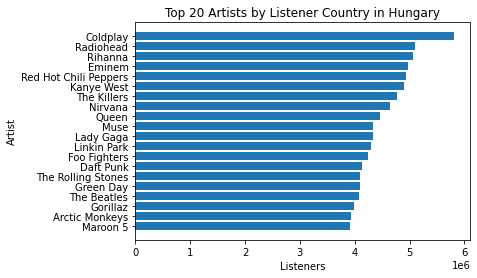

<Figure size 1440x720 with 0 Axes>

In [14]:
#Horizontal Bar of artist popularity by Listener count
cleaned_artist_df = cleaned_artist_df.sort_values("listeners")
plt.barh(cleaned_artist_df['name'],cleaned_artist_df['listeners'])

plt.title('Top 20 Artists by Listener Country in Hungary')
plt.xlabel('Listeners')
plt.ylabel('Artist')
plt.figure(figsize=(20,10))
plt.savefig("Output/Top20ArtistsHungary.png")
plt.show()